# Seminar Applied Text Mining
## Session 1: Processing and exploring raw texts
## Notebook 4: Conditional word counting in song lyrics, preprocessed with spaCy

### Importing packages

As always, we first need to load a number of required Python packages:
- `pandas` provides high-performance, easy-to-use data structures and data analysis tools.
- `itertools` provides functions for creating iterators for efficient looping through data structures.
- `json` allows to read and write JSON files.
- `matplotlib` is a plotting library which produces publication quality figures.
- `spacy` offers industrial-strength natural language processing

In [1]:
import pandas as pd
import numpy as np
import itertools
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import json
import matplotlib.pyplot as plt
import spacy

### Load documents
We load the lyrics of all songs which made it to the Billboard charts between 1964 and 2015. The data is in JSON Lines format (http://jsonlines.org/), so we must iterate over each line of the file and append it to a list called `corpus`.

In [2]:
file_path = 'billboard_lyrics_1964-2015.json'
corpus = []
with open(file_path) as f:
    for line in f:
        corpus.append(json.loads(line))

Show the first song of our dataset.

In [3]:
corpus[0]

{u'Artist': u'sam the sham and the pharaohs',
 u'Lyrics': u'sam the sham miscellaneous wooly bully wooly bully sam the sham  the pharaohs  domingo samudio uno dos one two tres quatro matty told hatty about a thing she saw had two big horns and a wooly jaw wooly bully wooly bully wooly bully wooly bully wooly bully hatty told matty lets dont take no chance lets not belseven come and learn to dance wooly bully wooly bully wooly bully wooly bully wooly bully matty told hatty thats the thing to do get you someone really to pull the wool with you wooly bully wooly bully wooly bully wooly bully wooly bully lseven  the letter l and the number 7 when typed they form a rough square l7 so the lyrics mean lets not be square',
 u'Rank': u'1',
 u'Song': u'wooly bully',
 u'Source': u'3',
 u'Year': u'1965'}

Access the lyrics of the first song.

In [4]:
corpus[0][u"Lyrics"]

u'sam the sham miscellaneous wooly bully wooly bully sam the sham  the pharaohs  domingo samudio uno dos one two tres quatro matty told hatty about a thing she saw had two big horns and a wooly jaw wooly bully wooly bully wooly bully wooly bully wooly bully hatty told matty lets dont take no chance lets not belseven come and learn to dance wooly bully wooly bully wooly bully wooly bully wooly bully matty told hatty thats the thing to do get you someone really to pull the wool with you wooly bully wooly bully wooly bully wooly bully wooly bully lseven  the letter l and the number 7 when typed they form a rough square l7 so the lyrics mean lets not be square'

### Preprocess songs
Fasten your seatbelts. With SpaCy's `nlp` function we can define a pipeline of langauge preprocessing steps in execute all of them in one run. 

In [ ]:
nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

docs_prep = corpus
for i, entry in enumerate(docs_prep):
    doc = nlp(entry[u"Lyrics"])
    tokens_to_keep = []
    for token in doc:
        if token.is_alpha and not token.is_stop: # see with what other tags spaCy has annotated the tokens: https://spacy.io/api/token#attributes1
            tokens_to_keep.append(token.lemma_)
    entry[u"Lyrics_prep"] = tokens_to_keep

In [ ]:
docs_prep[99]

### Count words by years
Calculate the frequency distributions for all years.

In [8]:
cfreq = nltk.ConditionalFreqDist()

for doc in docs_prep:
    for token in doc["Lyrics_prep"]:
        condition = doc["Year"]
        cfreq[condition][token] += 1

Show the distribution for the year 2000.

In [9]:
cfreq["2000"]

FreqDist({u'not': 726, u'be': 446, u'love': 375, u'like': 352, u'know': 336, u'baby': 276, u'go': 211, u's': 204, u'want': 203, u'get': 199, ...})

Get the distribution of `love` for all years.

In [10]:
word = "love"
years = sorted([int(item) for item in cfreq.conditions()])
word_timeseries = []
for year in years:
    word_timeseries.append(cfreq[str(year)][word])

In [11]:
word_timeseries

[307,
 212,
 380,
 223,
 279,
 293,
 230,
 276,
 267,
 336,
 303,
 494,
 367,
 308,
 520,
 320,
 290,
 310,
 285,
 283,
 335,
 394,
 387,
 474,
 560,
 471,
 385,
 405,
 438,
 396,
 462,
 263,
 328,
 334,
 351,
 375,
 302,
 265,
 425,
 281,
 260,
 207,
 255,
 337,
 347,
 400,
 253,
 302,
 354,
 280,
 330]

Let's plot the time series. It looks like the usage of `love` peaks in 1990. But the counts are absolute numbers and we don't know how many words have been sung in a given year (Do hip hop songs contain more words than 70s rock?).

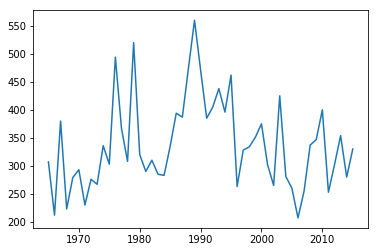

In [12]:
plt.plot(years, word_timeseries)
plt.show()

Hence, it's a good idea to take the total volume of words per year into consideration. 

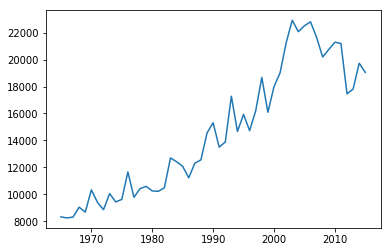

In [13]:
volume = []
for year in years:
    volume.append(cfreq[str(year)].N())
plt.plot(years, volume)
plt.show()

Strangely, the number of words per year increases over time (is this a data quality problem?). Therefore we should divide the frequency of `love` by the total number of words for each year.

In [14]:
word_timeseries_normalized = np.array(word_timeseries, dtype=np.float) / np.array(volume, dtype=np.float)
word_timeseries_normalized

array([0.03685032, 0.02568763, 0.04569505, 0.02463816, 0.03214286,
       0.02835301, 0.02443689, 0.03114421, 0.02654603, 0.03558945,
       0.03147725, 0.0423598 , 0.03751022, 0.02954436, 0.04907975,
       0.03120429, 0.02836463, 0.02954914, 0.02243741, 0.02278399,
       0.02772949, 0.0350971 , 0.03142764, 0.03773885, 0.03849326,
       0.03076622, 0.02851007, 0.02917867, 0.02535016, 0.02701044,
       0.02899824, 0.01785957, 0.02024691, 0.01788679, 0.02181208,
       0.02085651, 0.01588387, 0.01247646, 0.0185468 , 0.01273337,
       0.0115535 , 0.00907895, 0.0117772 , 0.01669474, 0.01672692,
       0.01879346, 0.01193453, 0.01730064, 0.01987201, 0.01419374,
       0.01732738])

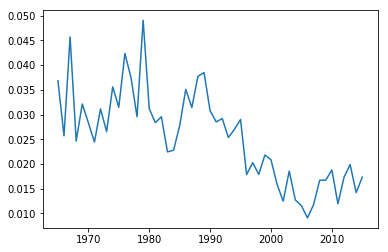

In [15]:
plt.plot(years, word_timeseries_normalized)
plt.show()

As we can see above, `love` peaked in the late 1970s and is on the decline since then. Sad.